<a href="https://colab.research.google.com/github/yuliiabosher/Fiber-optic-project/blob/parliamentary-constituencies/Parliamentary_constituencies_FTTP_historical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Geopandas package was installed in the Google Colab environment

In [1]:
!pip install geopandas

Geopandas, Pandas and Matplotlib libraries were imported

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

The shape file with geometries of the UK parliamentary constituencies was downloaded and uploaded to Github and then read using the Github link. The shape file can be accessed at https://www.data.gov.uk/dataset/76a9c59b-647f-46cc-8511-1cb6d52e5f1d/westminster-parliamentary-constituencies-december-2021-boundaries-uk-buc, Data Links -> Shapefile.  The resulting geodataframe of the UK parliamentary constituencies is as follows


In [11]:
constituencies = gpd.read_file('https://github.com/yuliiabosher/Fiber-optic-project/raw/refs/heads/parliamentary-constituencies/Westminster_Parliamentary_Constituencies_Dec_2021_UK_BUC_2022_-8882165546947265805.zip')
display(constituencies.head(650))

,PCON21CD,PCON21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,E14000530,Aldershot,484884,155126,-0.78410,51.2890,6fb8422e-dbb5-4615-946d-a50e24755686,"POLYGON ((485406.902 159918.603, 487630.497 15..."
1,E14000531,Aldridge-Brownhills,404723,302568,-1.93166,52.6209,ac7ca304-61c9-43ed-8da0-f673850fda51,"POLYGON ((406519.098 305054.298, 405782.501 30..."
2,E14000532,Altrincham and Sale West,374132,389051,-2.39049,53.3977,e9268ad9-79db-4f18-a45a-75b578f4acff,"POLYGON ((379104.096 393143.903, 377127.904 39..."
3,E14000533,Amber Valley,440478,349675,-1.39770,53.0428,85d80037-63e5-4460-acd6-1da8b91cda9c,"POLYGON ((444868.402 353958.1, 444018.6 351980..."
4,E14000534,Arundel and South Downs,510686,115542,-0.42635,50.9287,27686d42-4500-47bd-8200-79b90f0f4f0a,"POLYGON ((506641.497 128757.203, 506993.099 12..."
...,...,...,...,...,...,...,...,...
645,W07000076,Caerphilly,316860,188276,-3.20144,51.5872,8c729ece-7d14-4b55-9b8c-3dff44b53255,"POLYGON ((323547.3 189286.397, 322214.098 1883..."
646,W07000077,Islwyn,320517,196276,-3.15048,51.6596,7c062428-2efe-4675-9a0e-18e13946956a,"POLYGON ((322947.397 199706.204, 323910.198 19..."
647,W07000078,Vale of Glamorgan,302293,173080,-3.40742,51.4482,a802278e-c052-4950-a6f7-d4c3086bf090,"MULTIPOLYGON (((287042.095 176242.604, 286289...."
648,W07000079,Cardiff West,312437,178939,-3.26294,51.5026,298c3ca3-2a9b-46f5-8715-fa2e353aea7f,"POLYGON ((312599.599 182852.798, 313036.298 18..."


The columns 'PCON21CD', 'PCON21NM', 'geometry' were separated from the original geodataframe of the UK parliamentary constituencies to create a new cleaned geodataframe

In [45]:
constituencies_cleaned = constituencies[['PCON21CD', 'PCON21NM', 'geometry']]
constituencies_cleaned['PCON21NM'] = constituencies_cleaned['PCON21NM'].str.upper().str.strip()
display(constituencies_cleaned.head())

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,PCON21CD,PCON21NM,geometry
0,E14000530,ALDERSHOT,"POLYGON ((485406.902 159918.603, 487630.497 15..."
1,E14000531,ALDRIDGE-BROWNHILLS,"POLYGON ((406519.098 305054.298, 405782.501 30..."
2,E14000532,ALTRINCHAM AND SALE WEST,"POLYGON ((379104.096 393143.903, 377127.904 39..."
3,E14000533,AMBER VALLEY,"POLYGON ((444868.402 353958.1, 444018.6 351980..."
4,E14000534,ARUNDEL AND SOUTH DOWNS,"POLYGON ((506641.497 128757.203, 506993.099 12..."


The code from the notebook https://github.com/yuliiabosher/Fiber-optic-project/blob/parliamentary-constituencies/Full_Fibre_Aavailability_by_Postcode_in_2018.ipynb was copied to create the function that could be applied to multiple Ofcom datasets for previous years

In [128]:
def clean_and_plot_choropleth(link_to_file, year):
  ofcom_df = pd.read_csv(link_to_file, encoding="latin")
  display(ofcom_df.head())
  display(ofcom_df.columns)
  ofcom_full_fibre_df = ofcom_df[['parliamentary_constituency_name','All Premises', 'Number of premises with Full Fibre availability']]
  if ofcom_full_fibre_df['parliamentary_constituency_name'].str.contains('YNYS MÃN').any():
    index = ofcom_full_fibre_df[ofcom_full_fibre_df['parliamentary_constituency_name'].str.contains('YNYS MÃN')].index[0]
    ofcom_full_fibre_df.loc[index,'parliamentary_constituency_name'] = 'YNYS MÔN'
  display(ofcom_full_fibre_df[ofcom_full_fibre_df['parliamentary_constituency_name'].str.contains('YNYS')])
  ofcom_full_fibre_df['parliamentary_constituency_name'] = ofcom_full_fibre_df['parliamentary_constituency_name'].str.upper().str.strip()
  display(ofcom_full_fibre_df.head())
  display(f'Number of rows in the geodataframe of the UK constituencies - {len(constituencies_cleaned)}')
  display(f'Number of rows in the Ofcom dataframe on Fill Fibre availability by constituency - {len(ofcom_full_fibre_df)}')
  fibre_by_constituency_geo_df = constituencies_cleaned.merge(ofcom_full_fibre_df, left_on='PCON21NM', right_on='parliamentary_constituency_name')
  display(fibre_by_constituency_geo_df.head())
  display(f'The legth of the merged dataframe is {len(fibre_by_constituency_geo_df)}')
  fibre_by_constituency_geo_df.drop('PCON21NM', axis=1, inplace=True)
  display(fibre_by_constituency_geo_df.head())
  fibre_by_constituency_geo_df.columns = ['Constituency Code', 'geometry', 'Constituency Name', 'Total Premises', 'Premises with Full Fibre Availability']
  display(fibre_by_constituency_geo_df.head())
  display(fibre_by_constituency_geo_df.info())
  fibre_by_constituency_geo_df['Percentage of Premises with Full Fibre Availability'] = \
  fibre_by_constituency_geo_df['Premises with Full Fibre Availability'] / fibre_by_constituency_geo_df['Total Premises']
  display(fibre_by_constituency_geo_df.head())
  fig, ax = plt.subplots(1, 1)
  fibre_by_constituency_geo_df.plot(column='Percentage of Premises with Full Fibre Availability', cmap='Blues', ax=ax)
  fig.set_size_inches(8,6)
  plt.style.use('seaborn-v0_8-whitegrid')
  font = {'family':'monospace','color':'black','size':20}
  ax.set_title(year, fontdict = font)
  plt.axis('off')
  plt.show()

The file on 2024 Fixed coverage parliamentary constituency data was downloaded from https://www.ofcom.org.uk/phones-and-broadband/coverage-and-speeds/connected-nations-update-spring-2024/, third row "Fixed coverage parliamentary constituency data". Then it was unzipped, uploaded to Github and read using the Github link

,parl_const,parliamentary_constituency_name,All Premises,All Matched Premises,SFBB availability (% premises),UFBB (100Mbit/s) availability (% premises),UFBB availability (% premises),Full Fibre availability (% premises),Gigabit availability (% premises),% of premises unable to receive 2Mbit/s,...,% of premises with 0<2Mbit/s download speed,% of premises with 2<5Mbit/s download speed,% of premises with 5<10Mbit/s download speed,% of premises with 10<30Mbit/s download speed,Number of premises with 30<300Mbit/s download speed,Number of premises with >=300Mbit/s download speed,Number of premises with 0<2Mbit/s download speed,Number of premises with 2<5Mbit/s download speed,Number of premises with 5<10Mbit/s download speed,Number of premises with 10<30Mbit/s download speed
0,W07000049,ABERAVON,33253,33216,98.1,83.0,83.0,39.9,83.0,0.1,...,0.1,0.1,0.1,1.5,5020,27600,40,33,35,488
1,W07000058,ABERCONWY,30620,30585,96.3,77.1,77.1,77.1,77.1,0.5,...,0.5,0.6,0.6,1.8,5875,23613,159,195,187,556
2,S14000001,ABERDEEN NORTH,58918,58842,96.8,90.5,89.9,88.8,88.8,0.0,...,0.0,0.0,0.1,2.9,4092,52948,0,1,83,1718
3,S14000002,ABERDEEN SOUTH,54641,54580,97.5,86.5,86.1,85.9,85.9,0.1,...,0.1,0.2,0.2,1.9,6188,47071,32,135,102,1052
4,S14000003,AIRDRIE AND SHOTTS,42026,42014,97.8,85.9,85.9,41.6,85.9,0.0,...,0.0,0.3,0.3,1.5,5007,36111,13,112,125,646


Index(['parl_const', 'parliamentary_constituency_name', 'All Premises',
       'All Matched Premises', 'SFBB availability (% premises)',
       'UFBB (100Mbit/s) availability (% premises)',
       'UFBB availability (% premises)',
       'Full Fibre availability (% premises)',
       'Gigabit availability (% premises)',
       '% of premises unable to receive 2Mbit/s',
       '% of premises unable to receive 5Mbit/s',
       '% of premises unable to receive 10Mbit/s',
       '% of premises unable to receive 30Mbit/s',
       '% of premises below the USO', '% of premises with NGA',
       '% of premises able to receive decent broadband from FWA',
       'Number of premises with SFBB availability',
       'Number of premises with UFBB (100Mbit/s) availability',
       'Number of premises with UFBB availability',
       'Number of premises unable to receive 2Mbit/s',
       'Number of premises unable to receive 5Mbit/s',
       'Number of premises unable to receive 10Mbit/s',
       'Numb

,parliamentary_constituency_name,All Premises,Number of premises with Full Fibre availability
647,YNYS MÔN,38091,13477


<ipython-input-128-e606a9179e64>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofcom_full_fibre_df['parliamentary_constituency_name'] = ofcom_full_fibre_df['parliamentary_constituency_name'].str.upper().str.strip()


,parliamentary_constituency_name,All Premises,Number of premises with Full Fibre availability
0,ABERAVON,33253,13278
1,ABERCONWY,30620,23613
2,ABERDEEN NORTH,58918,52303
3,ABERDEEN SOUTH,54641,46944
4,AIRDRIE AND SHOTTS,42026,17484


'Number of rows in the geodataframe of the UK constituencies - 650'

'Number of rows in the Ofcom dataframe on Fill Fibre availability by constituency - 650'

,PCON21CD,PCON21NM,geometry,parliamentary_constituency_name,All Premises,Number of premises with Full Fibre availability
0,E14000530,ALDERSHOT,"POLYGON ((485406.902 159918.603, 487630.497 15...",ALDERSHOT,48683,35403
1,E14000531,ALDRIDGE-BROWNHILLS,"POLYGON ((406519.098 305054.298, 405782.501 30...",ALDRIDGE-BROWNHILLS,34293,21361
2,E14000532,ALTRINCHAM AND SALE WEST,"POLYGON ((379104.096 393143.903, 377127.904 39...",ALTRINCHAM AND SALE WEST,45481,35846
3,E14000533,AMBER VALLEY,"POLYGON ((444868.402 353958.1, 444018.6 351980...",AMBER VALLEY,45332,34471
4,E14000534,ARUNDEL AND SOUTH DOWNS,"POLYGON ((506641.497 128757.203, 506993.099 12...",ARUNDEL AND SOUTH DOWNS,50925,23675


'The legth of the merged dataframe is 650'

,PCON21CD,geometry,parliamentary_constituency_name,All Premises,Number of premises with Full Fibre availability
0,E14000530,"POLYGON ((485406.902 159918.603, 487630.497 15...",ALDERSHOT,48683,35403
1,E14000531,"POLYGON ((406519.098 305054.298, 405782.501 30...",ALDRIDGE-BROWNHILLS,34293,21361
2,E14000532,"POLYGON ((379104.096 393143.903, 377127.904 39...",ALTRINCHAM AND SALE WEST,45481,35846
3,E14000533,"POLYGON ((444868.402 353958.1, 444018.6 351980...",AMBER VALLEY,45332,34471
4,E14000534,"POLYGON ((506641.497 128757.203, 506993.099 12...",ARUNDEL AND SOUTH DOWNS,50925,23675


,Constituency Code,geometry,Constituency Name,Total Premises,Premises with Full Fibre Availability
0,E14000530,"POLYGON ((485406.902 159918.603, 487630.497 15...",ALDERSHOT,48683,35403
1,E14000531,"POLYGON ((406519.098 305054.298, 405782.501 30...",ALDRIDGE-BROWNHILLS,34293,21361
2,E14000532,"POLYGON ((379104.096 393143.903, 377127.904 39...",ALTRINCHAM AND SALE WEST,45481,35846
3,E14000533,"POLYGON ((444868.402 353958.1, 444018.6 351980...",AMBER VALLEY,45332,34471
4,E14000534,"POLYGON ((506641.497 128757.203, 506993.099 12...",ARUNDEL AND SOUTH DOWNS,50925,23675


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Constituency Code                      650 non-null    object  
 1   geometry                               650 non-null    geometry
 2   Constituency Name                      650 non-null    object  
 3   Total Premises                         650 non-null    int64   
 4   Premises with Full Fibre Availability  650 non-null    int64   
dtypes: geometry(1), int64(2), object(2)
memory usage: 25.5+ KB


None

,Constituency Code,geometry,Constituency Name,Total Premises,Premises with Full Fibre Availability,Percentage of Premises with Full Fibre Availability
0,E14000530,"POLYGON ((485406.902 159918.603, 487630.497 15...",ALDERSHOT,48683,35403,0.727215
1,E14000531,"POLYGON ((406519.098 305054.298, 405782.501 30...",ALDRIDGE-BROWNHILLS,34293,21361,0.622897
2,E14000532,"POLYGON ((379104.096 393143.903, 377127.904 39...",ALTRINCHAM AND SALE WEST,45481,35846,0.788153
3,E14000533,"POLYGON ((444868.402 353958.1, 444018.6 351980...",AMBER VALLEY,45332,34471,0.760412
4,E14000534,"POLYGON ((506641.497 128757.203, 506993.099 12...",ARUNDEL AND SOUTH DOWNS,50925,23675,0.464899


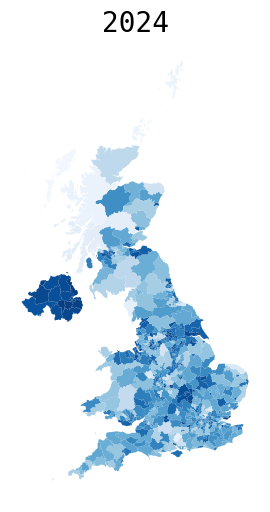

In [129]:
clean_and_plot_choropleth("https://raw.githubusercontent.com/yuliiabosher/Fiber-optic-project/refs/heads/parliamentary-constituencies/202401_fixed_pcon_coverage_r01.csv", \
2024)

The Ofcom data from 2023 report was cleaned and plotted. The file was sourced from https://www.ofcom.org.uk/phones-and-broadband/coverage-and-speeds/data/, fifth row "Fixed coverage parliamentary constituency data".

,parl_const,parliamentary_constituency_name,All Premises,All Matched Premises,SFBB availability (% premises),UFBB (100Mbit/s) availability (% premises),UFBB availability (% premises),Full Fibre availability (% premises),Gigabit availability (% premises),% of premises unable to receive 2Mbit/s,...,% of premises with 0<2Mbit/s download speed,% of premises with 2<5Mbit/s download speed,% of premises with 5<10Mbit/s download speed,% of premises with 10<30Mbit/s download speed,Number of premises with 30<300Mbit/s download speed,Number of premises with >=300Mbit/s download speed,Number of premises with 0<2Mbit/s download speed,Number of premises with 2<5Mbit/s download speed,Number of premises with 5<10Mbit/s download speed,Number of premises with 10<30Mbit/s download speed
0,E14000530,ALDERSHOT,48200,48105,97.7,84.7,84.7,27.5,84.5,0.0,...,0.0,0.7,0.7,0.6,6295,40816,18,347,338,291
1,E14000531,ALDRIDGE-BROWNHILLS,34230,34201,98.0,84.0,81.0,21.1,79.3,0.0,...,0.0,0.0,0.7,1.2,5820,27732,2,1,241,405
2,E14000532,ALTRINCHAM AND SALE WEST,45285,45217,97.2,76.2,70.6,13.1,66.0,0.1,...,0.1,0.3,0.0,2.3,12040,31966,35,138,17,1021
3,E14000533,AMBER VALLEY,44676,44483,96.4,52.4,52.0,51.8,51.9,0.0,...,0.0,0.1,0.2,2.9,19834,23240,13,32,90,1274
4,E14000534,ARUNDEL AND SOUTH DOWNS,49878,49653,92.0,34.1,33.0,32.3,32.3,0.4,...,0.4,0.6,1.0,5.6,29420,16465,198,288,513,2769


Index(['parl_const', 'parliamentary_constituency_name', 'All Premises',
       'All Matched Premises', 'SFBB availability (% premises)',
       'UFBB (100Mbit/s) availability (% premises)',
       'UFBB availability (% premises)',
       'Full Fibre availability (% premises)',
       'Gigabit availability (% premises)',
       '% of premises unable to receive 2Mbit/s',
       '% of premises unable to receive 5Mbit/s',
       '% of premises unable to receive 10Mbit/s',
       '% of premises unable to receive 30Mbit/s',
       '% of premises below the USO', '% of premises with NGA',
       'Number of premises with SFBB availability',
       'Number of premises with UFBB (100Mbit/s) availability',
       'Number of premises with UFBB availability',
       'Number of premises unable to receive 2Mbit/s',
       'Number of premises unable to receive 5Mbit/s',
       'Number of premises unable to receive 10Mbit/s',
       'Number of premises unable to receive 30Mbit/s',
       'Number of prem

,parliamentary_constituency_name,All Premises,Number of premises with Full Fibre availability
610,YNYS MÔN,37756,8331


<ipython-input-128-e606a9179e64>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofcom_full_fibre_df['parliamentary_constituency_name'] = ofcom_full_fibre_df['parliamentary_constituency_name'].str.upper().str.strip()


,parliamentary_constituency_name,All Premises,Number of premises with Full Fibre availability
0,ALDERSHOT,48200,13233
1,ALDRIDGE-BROWNHILLS,34230,7239
2,ALTRINCHAM AND SALE WEST,45285,5933
3,AMBER VALLEY,44676,23131
4,ARUNDEL AND SOUTH DOWNS,49878,16090


'Number of rows in the geodataframe of the UK constituencies - 650'

'Number of rows in the Ofcom dataframe on Fill Fibre availability by constituency - 650'

,PCON21CD,PCON21NM,geometry,parliamentary_constituency_name,All Premises,Number of premises with Full Fibre availability
0,E14000530,ALDERSHOT,"POLYGON ((485406.902 159918.603, 487630.497 15...",ALDERSHOT,48200,13233
1,E14000531,ALDRIDGE-BROWNHILLS,"POLYGON ((406519.098 305054.298, 405782.501 30...",ALDRIDGE-BROWNHILLS,34230,7239
2,E14000532,ALTRINCHAM AND SALE WEST,"POLYGON ((379104.096 393143.903, 377127.904 39...",ALTRINCHAM AND SALE WEST,45285,5933
3,E14000533,AMBER VALLEY,"POLYGON ((444868.402 353958.1, 444018.6 351980...",AMBER VALLEY,44676,23131
4,E14000534,ARUNDEL AND SOUTH DOWNS,"POLYGON ((506641.497 128757.203, 506993.099 12...",ARUNDEL AND SOUTH DOWNS,49878,16090


'The legth of the merged dataframe is 650'

,PCON21CD,geometry,parliamentary_constituency_name,All Premises,Number of premises with Full Fibre availability
0,E14000530,"POLYGON ((485406.902 159918.603, 487630.497 15...",ALDERSHOT,48200,13233
1,E14000531,"POLYGON ((406519.098 305054.298, 405782.501 30...",ALDRIDGE-BROWNHILLS,34230,7239
2,E14000532,"POLYGON ((379104.096 393143.903, 377127.904 39...",ALTRINCHAM AND SALE WEST,45285,5933
3,E14000533,"POLYGON ((444868.402 353958.1, 444018.6 351980...",AMBER VALLEY,44676,23131
4,E14000534,"POLYGON ((506641.497 128757.203, 506993.099 12...",ARUNDEL AND SOUTH DOWNS,49878,16090


,Constituency Code,geometry,Constituency Name,Total Premises,Premises with Full Fibre Availability
0,E14000530,"POLYGON ((485406.902 159918.603, 487630.497 15...",ALDERSHOT,48200,13233
1,E14000531,"POLYGON ((406519.098 305054.298, 405782.501 30...",ALDRIDGE-BROWNHILLS,34230,7239
2,E14000532,"POLYGON ((379104.096 393143.903, 377127.904 39...",ALTRINCHAM AND SALE WEST,45285,5933
3,E14000533,"POLYGON ((444868.402 353958.1, 444018.6 351980...",AMBER VALLEY,44676,23131
4,E14000534,"POLYGON ((506641.497 128757.203, 506993.099 12...",ARUNDEL AND SOUTH DOWNS,49878,16090


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Constituency Code                      650 non-null    object  
 1   geometry                               650 non-null    geometry
 2   Constituency Name                      650 non-null    object  
 3   Total Premises                         650 non-null    int64   
 4   Premises with Full Fibre Availability  650 non-null    int64   
dtypes: geometry(1), int64(2), object(2)
memory usage: 25.5+ KB


None

,Constituency Code,geometry,Constituency Name,Total Premises,Premises with Full Fibre Availability,Percentage of Premises with Full Fibre Availability
0,E14000530,"POLYGON ((485406.902 159918.603, 487630.497 15...",ALDERSHOT,48200,13233,0.274544
1,E14000531,"POLYGON ((406519.098 305054.298, 405782.501 30...",ALDRIDGE-BROWNHILLS,34230,7239,0.211481
2,E14000532,"POLYGON ((379104.096 393143.903, 377127.904 39...",ALTRINCHAM AND SALE WEST,45285,5933,0.131015
3,E14000533,"POLYGON ((444868.402 353958.1, 444018.6 351980...",AMBER VALLEY,44676,23131,0.517750
4,E14000534,"POLYGON ((506641.497 128757.203, 506993.099 12...",ARUNDEL AND SOUTH DOWNS,49878,16090,0.322587


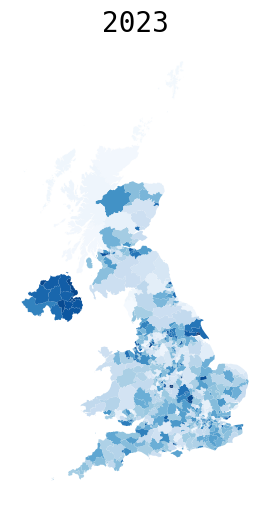

In [130]:
clean_and_plot_choropleth("https://raw.githubusercontent.com/yuliiabosher/Fiber-optic-project/refs/heads/parliamentary-constituencies/202209_fixed_pcon_coverage_r02.csv", \
2023)

The file from 2022 report was sourced from https://www.ofcom.org.uk/phones-and-broadband/coverage-and-speeds/connected-nations-2021-data-downloads/, fifth row "Fixed coverage parliamentary constituency data".

,parl_const,parliamentary_constituency_name,All Premises,All Matched Premises,SFBB availability (% premises),UFBB (100Mbit/s) availability (% premises),UFBB availability (% premises),Full Fibre availability (% premises),Gigabit availability (% premises),% of premises unable to receive 2Mbit/s,...,% of premises with 0<2Mbit/s download speed,% of premises with 2<5Mbit/s download speed,% of premises with 5<10Mbit/s download speed,% of premises with 10<30Mbit/s download speed,Number of premises with 30<300Mbit/s download speed,Number of premises with >=300Mbit/s download speed,Number of premises with 0<2Mbit/s download speed,Number of premises with 2<5Mbit/s download speed,Number of premises with 5<10Mbit/s download speed,Number of premises with 10<30Mbit/s download speed
0,E14000530,ALDERSHOT,47679,47503,97.0,82.0,81.7,4.8,46.6,0.1,...,0.1,0.7,0.7,1.1,7290,38976,52,332,340,513
1,E14000531,ALDRIDGE-BROWNHILLS,34179,34121,97.9,83.7,79.8,17.5,78.5,0.0,...,0.0,0.0,0.4,1.5,6181,27281,2,2,133,522
2,E14000532,ALTRINCHAM AND SALE WEST,45091,44986,96.7,70.4,62.1,2.6,55.9,0.1,...,0.1,0.3,0.1,2.5,15596,28024,57,126,54,1129
3,E14000533,AMBER VALLEY,44260,43969,95.2,27.9,27.3,27.0,27.0,0.0,...,0.0,0.1,0.3,3.7,30058,12068,17,54,153,1619
4,E14000534,ARUNDEL AND SOUTH DOWNS,49318,48899,90.3,12.0,10.8,10.1,10.1,0.4,...,0.4,0.8,1.2,6.4,39204,5324,221,391,600,3159


Index(['parl_const', 'parliamentary_constituency_name', 'All Premises',
       'All Matched Premises', 'SFBB availability (% premises)',
       'UFBB (100Mbit/s) availability (% premises)',
       'UFBB availability (% premises)',
       'Full Fibre availability (% premises)',
       'Gigabit availability (% premises)',
       '% of premises unable to receive 2Mbit/s',
       '% of premises unable to receive 5Mbit/s',
       '% of premises unable to receive 10Mbit/s',
       '% of premises unable to receive 30Mbit/s',
       '% of premises below the USO', '% of premises with NGA',
       'Number of premises with SFBB availability',
       'Number of premises with UFBB (100Mbit/s) availability',
       'Number of premises with UFBB availability',
       'Number of premises unable to receive 2Mbit/s',
       'Number of premises unable to receive 5Mbit/s',
       'Number of premises unable to receive 10Mbit/s',
       'Number of premises unable to receive 30Mbit/s',
       'Number of prem

,parliamentary_constituency_name,All Premises,Number of premises with Full Fibre availability
610,YNYS MÔN,37531,6359


<ipython-input-128-e606a9179e64>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofcom_full_fibre_df['parliamentary_constituency_name'] = ofcom_full_fibre_df['parliamentary_constituency_name'].str.upper().str.strip()


,parliamentary_constituency_name,All Premises,Number of premises with Full Fibre availability
0,ALDERSHOT,47679,2310
1,ALDRIDGE-BROWNHILLS,34179,5989
2,ALTRINCHAM AND SALE WEST,45091,1185
3,AMBER VALLEY,44260,11945
4,ARUNDEL AND SOUTH DOWNS,49318,4963


'Number of rows in the geodataframe of the UK constituencies - 650'

'Number of rows in the Ofcom dataframe on Fill Fibre availability by constituency - 650'

,PCON21CD,PCON21NM,geometry,parliamentary_constituency_name,All Premises,Number of premises with Full Fibre availability
0,E14000530,ALDERSHOT,"POLYGON ((485406.902 159918.603, 487630.497 15...",ALDERSHOT,47679,2310
1,E14000531,ALDRIDGE-BROWNHILLS,"POLYGON ((406519.098 305054.298, 405782.501 30...",ALDRIDGE-BROWNHILLS,34179,5989
2,E14000532,ALTRINCHAM AND SALE WEST,"POLYGON ((379104.096 393143.903, 377127.904 39...",ALTRINCHAM AND SALE WEST,45091,1185
3,E14000533,AMBER VALLEY,"POLYGON ((444868.402 353958.1, 444018.6 351980...",AMBER VALLEY,44260,11945
4,E14000534,ARUNDEL AND SOUTH DOWNS,"POLYGON ((506641.497 128757.203, 506993.099 12...",ARUNDEL AND SOUTH DOWNS,49318,4963


'The legth of the merged dataframe is 650'

,PCON21CD,geometry,parliamentary_constituency_name,All Premises,Number of premises with Full Fibre availability
0,E14000530,"POLYGON ((485406.902 159918.603, 487630.497 15...",ALDERSHOT,47679,2310
1,E14000531,"POLYGON ((406519.098 305054.298, 405782.501 30...",ALDRIDGE-BROWNHILLS,34179,5989
2,E14000532,"POLYGON ((379104.096 393143.903, 377127.904 39...",ALTRINCHAM AND SALE WEST,45091,1185
3,E14000533,"POLYGON ((444868.402 353958.1, 444018.6 351980...",AMBER VALLEY,44260,11945
4,E14000534,"POLYGON ((506641.497 128757.203, 506993.099 12...",ARUNDEL AND SOUTH DOWNS,49318,4963


,Constituency Code,geometry,Constituency Name,Total Premises,Premises with Full Fibre Availability
0,E14000530,"POLYGON ((485406.902 159918.603, 487630.497 15...",ALDERSHOT,47679,2310
1,E14000531,"POLYGON ((406519.098 305054.298, 405782.501 30...",ALDRIDGE-BROWNHILLS,34179,5989
2,E14000532,"POLYGON ((379104.096 393143.903, 377127.904 39...",ALTRINCHAM AND SALE WEST,45091,1185
3,E14000533,"POLYGON ((444868.402 353958.1, 444018.6 351980...",AMBER VALLEY,44260,11945
4,E14000534,"POLYGON ((506641.497 128757.203, 506993.099 12...",ARUNDEL AND SOUTH DOWNS,49318,4963


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Constituency Code                      650 non-null    object  
 1   geometry                               650 non-null    geometry
 2   Constituency Name                      650 non-null    object  
 3   Total Premises                         650 non-null    int64   
 4   Premises with Full Fibre Availability  650 non-null    int64   
dtypes: geometry(1), int64(2), object(2)
memory usage: 25.5+ KB


None

,Constituency Code,geometry,Constituency Name,Total Premises,Premises with Full Fibre Availability,Percentage of Premises with Full Fibre Availability
0,E14000530,"POLYGON ((485406.902 159918.603, 487630.497 15...",ALDERSHOT,47679,2310,0.048449
1,E14000531,"POLYGON ((406519.098 305054.298, 405782.501 30...",ALDRIDGE-BROWNHILLS,34179,5989,0.175225
2,E14000532,"POLYGON ((379104.096 393143.903, 377127.904 39...",ALTRINCHAM AND SALE WEST,45091,1185,0.026280
3,E14000533,"POLYGON ((444868.402 353958.1, 444018.6 351980...",AMBER VALLEY,44260,11945,0.269883
4,E14000534,"POLYGON ((506641.497 128757.203, 506993.099 12...",ARUNDEL AND SOUTH DOWNS,49318,4963,0.100633


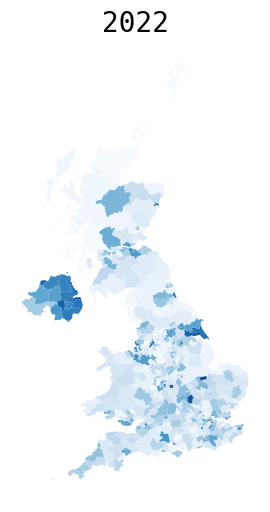

In [132]:
clean_and_plot_choropleth("https://raw.githubusercontent.com/yuliiabosher/Fiber-optic-project/refs/heads/parliamentary-constituencies/202109_fixed_pcon_coverage_r01.csv", \
2022)

The file from the 2020 report was sourced from https://www.ofcom.org.uk/phones-and-broadband/coverage-and-speeds/data-downloads3/, the fifth row "Fixed coverage parliamentary constituency data".

,parl_const,parliamentary_constituency_name,All Premises,All Matched Premises,SFBB availability (% premises),UFBB (100Mbit/s) availability (% premises),UFBB availability (% premises),Full Fibre availability (% premises),Gigabit availability (% premises),% of premises unable to receive 2Mbit/s,...,% of premises with 0<2Mbit/s download speed,% of premises with 2<5Mbit/s download speed,% of premises with 5<10Mbit/s download speed,% of premises with 10<30Mbit/s download speed,Number of premises with 30<300Mbit/s download speed,Number of premises with >=300Mbit/s download speed,Number of premises with 0<2Mbit/s download speed,Number of premises with 2<5Mbit/s download speed,Number of premises with 5<10Mbit/s download speed,Number of premises with 10<30Mbit/s download speed
0,E14000530,ALDERSHOT,47471,47432,97.4,81.5,81.3,4.2,4.2,0.1,...,0.1,0.7,0.5,1.1,7661,38583,50,342,255,541
1,E14000531,ALDRIDGE-BROWNHILLS,34609,34603,99.1,84.4,80.4,17.7,78.5,0.0,...,0.0,0.0,0.1,0.8,6481,27814,2,2,24,280
2,E14000532,ALTRINCHAM AND SALE WEST,45006,44890,96.7,70.5,62.1,1.9,55.4,0.1,...,0.1,0.3,0.1,2.5,15546,27965,46,140,56,1137
3,E14000533,AMBER VALLEY,43916,43818,95.1,27.4,26.9,26.8,26.8,0.1,...,0.1,0.2,0.4,4.0,29954,11792,23,97,179,1773
4,E14000534,ARUNDEL AND SOUTH DOWNS,49115,48710,90.0,8.5,7.4,6.6,6.6,0.4,...,0.4,0.8,1.3,6.7,40591,3615,215,394,620,3275


Index(['parl_const', 'parliamentary_constituency_name', 'All Premises',
       'All Matched Premises', 'SFBB availability (% premises)',
       'UFBB (100Mbit/s) availability (% premises)',
       'UFBB availability (% premises)',
       'Full Fibre availability (% premises)',
       'Gigabit availability (% premises)',
       '% of premises unable to receive 2Mbit/s',
       '% of premises unable to receive 5Mbit/s',
       '% of premises unable to receive 10Mbit/s',
       '% of premises unable to receive 30Mbit/s',
       '% of premises below the USO', '% of premises with NGA',
       'Number of premises with SFBB availability',
       'Number of premises with UFBB (100Mbit/s) availability',
       'Number of premises with UFBB availability',
       'Number of premises unable to receive 2Mbit/s',
       'Number of premises unable to receive 5Mbit/s',
       'Number of premises unable to receive 10Mbit/s',
       'Number of premises unable to receive 30Mbit/s',
       'Number of prem

,parliamentary_constituency_name,All Premises,Number of premises with Full Fibre availability
610,YNYS MÔN,37150,5981


<ipython-input-128-e606a9179e64>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofcom_full_fibre_df['parliamentary_constituency_name'] = ofcom_full_fibre_df['parliamentary_constituency_name'].str.upper().str.strip()


,parliamentary_constituency_name,All Premises,Number of premises with Full Fibre availability
0,ALDERSHOT,47471,2004
1,ALDRIDGE-BROWNHILLS,34609,6120
2,ALTRINCHAM AND SALE WEST,45006,874
3,AMBER VALLEY,43916,11751
4,ARUNDEL AND SOUTH DOWNS,49115,3223


'Number of rows in the geodataframe of the UK constituencies - 650'

'Number of rows in the Ofcom dataframe on Fill Fibre availability by constituency - 650'

,PCON21CD,PCON21NM,geometry,parliamentary_constituency_name,All Premises,Number of premises with Full Fibre availability
0,E14000530,ALDERSHOT,"POLYGON ((485406.902 159918.603, 487630.497 15...",ALDERSHOT,47471,2004
1,E14000531,ALDRIDGE-BROWNHILLS,"POLYGON ((406519.098 305054.298, 405782.501 30...",ALDRIDGE-BROWNHILLS,34609,6120
2,E14000532,ALTRINCHAM AND SALE WEST,"POLYGON ((379104.096 393143.903, 377127.904 39...",ALTRINCHAM AND SALE WEST,45006,874
3,E14000533,AMBER VALLEY,"POLYGON ((444868.402 353958.1, 444018.6 351980...",AMBER VALLEY,43916,11751
4,E14000534,ARUNDEL AND SOUTH DOWNS,"POLYGON ((506641.497 128757.203, 506993.099 12...",ARUNDEL AND SOUTH DOWNS,49115,3223


'The legth of the merged dataframe is 650'

,PCON21CD,geometry,parliamentary_constituency_name,All Premises,Number of premises with Full Fibre availability
0,E14000530,"POLYGON ((485406.902 159918.603, 487630.497 15...",ALDERSHOT,47471,2004
1,E14000531,"POLYGON ((406519.098 305054.298, 405782.501 30...",ALDRIDGE-BROWNHILLS,34609,6120
2,E14000532,"POLYGON ((379104.096 393143.903, 377127.904 39...",ALTRINCHAM AND SALE WEST,45006,874
3,E14000533,"POLYGON ((444868.402 353958.1, 444018.6 351980...",AMBER VALLEY,43916,11751
4,E14000534,"POLYGON ((506641.497 128757.203, 506993.099 12...",ARUNDEL AND SOUTH DOWNS,49115,3223


,Constituency Code,geometry,Constituency Name,Total Premises,Premises with Full Fibre Availability
0,E14000530,"POLYGON ((485406.902 159918.603, 487630.497 15...",ALDERSHOT,47471,2004
1,E14000531,"POLYGON ((406519.098 305054.298, 405782.501 30...",ALDRIDGE-BROWNHILLS,34609,6120
2,E14000532,"POLYGON ((379104.096 393143.903, 377127.904 39...",ALTRINCHAM AND SALE WEST,45006,874
3,E14000533,"POLYGON ((444868.402 353958.1, 444018.6 351980...",AMBER VALLEY,43916,11751
4,E14000534,"POLYGON ((506641.497 128757.203, 506993.099 12...",ARUNDEL AND SOUTH DOWNS,49115,3223


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Constituency Code                      650 non-null    object  
 1   geometry                               650 non-null    geometry
 2   Constituency Name                      650 non-null    object  
 3   Total Premises                         650 non-null    int64   
 4   Premises with Full Fibre Availability  650 non-null    int64   
dtypes: geometry(1), int64(2), object(2)
memory usage: 25.5+ KB


None

,Constituency Code,geometry,Constituency Name,Total Premises,Premises with Full Fibre Availability,Percentage of Premises with Full Fibre Availability
0,E14000530,"POLYGON ((485406.902 159918.603, 487630.497 15...",ALDERSHOT,47471,2004,0.042215
1,E14000531,"POLYGON ((406519.098 305054.298, 405782.501 30...",ALDRIDGE-BROWNHILLS,34609,6120,0.176833
2,E14000532,"POLYGON ((379104.096 393143.903, 377127.904 39...",ALTRINCHAM AND SALE WEST,45006,874,0.019420
3,E14000533,"POLYGON ((444868.402 353958.1, 444018.6 351980...",AMBER VALLEY,43916,11751,0.267579
4,E14000534,"POLYGON ((506641.497 128757.203, 506993.099 12...",ARUNDEL AND SOUTH DOWNS,49115,3223,0.065622


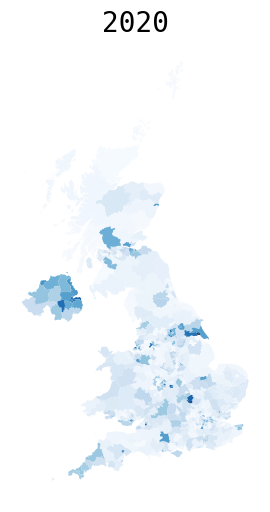

In [133]:
clean_and_plot_choropleth("https://raw.githubusercontent.com/yuliiabosher/Fiber-optic-project/refs/heads/parliamentary-constituencies/202009_fixed_pcon_coverage_r01.csv", \
2020)